In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import anderson
import seaborn as sns

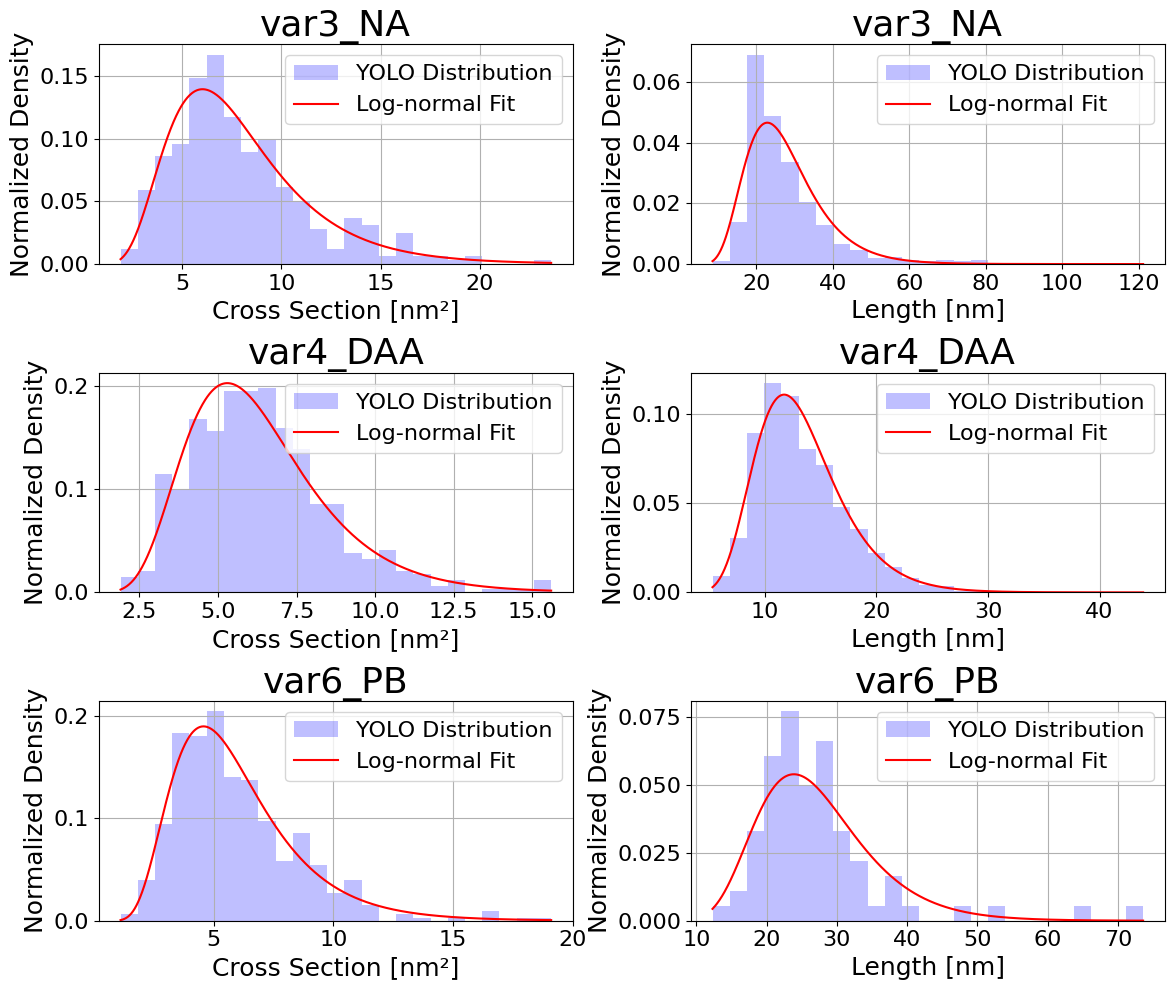

In [ ]:

def fit_and_plot_lognormal(ax, data, label, alloy_name):
    shape, loc, scale = lognorm.fit(data, floc=0)
    x = np.linspace(min(data), max(data), 1000)
    pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

    ax.hist(data, bins=25, density=True, alpha=0.25, color='blue', label='YOLO Distribution')
    ax.plot(x, pdf, 'r-', label='Log-normal Fit')
    ax.set_xlabel(label, fontsize=18)
    ax.set_ylabel('Normalized Density', fontsize=18)
    ax.set_title(alloy_name, fontsize=26)
    ax.tick_params(axis='both', labelsize=16)
    ax.grid(True)
    ax.legend(fontsize=16)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()

alloys = ['var3_NA', 'var4_DAA', 'var6_PB']
labels = ['Cross Section [nm²]', 'Length [nm]']

for i, alloy in enumerate(alloys):
    df_cross = pd.read_csv(f'{alloy}_statistics_cross.csv')
    df_len = pd.read_csv(f'{alloy}_statistics_length.csv')

    cross_sections = df_cross['Cross section [nm^2]'].dropna().values
    lengths = df_len['Length [nm]'].dropna().values

   
    fit_and_plot_lognormal(axes[2*i], cross_sections, labels[0], alloy)
    fit_and_plot_lognormal(axes[2*i+1], lengths, labels[1], alloy)

plt.tight_layout()
plt.savefig("lognormal_fit_alloys.png", dpi=300)
plt.show()


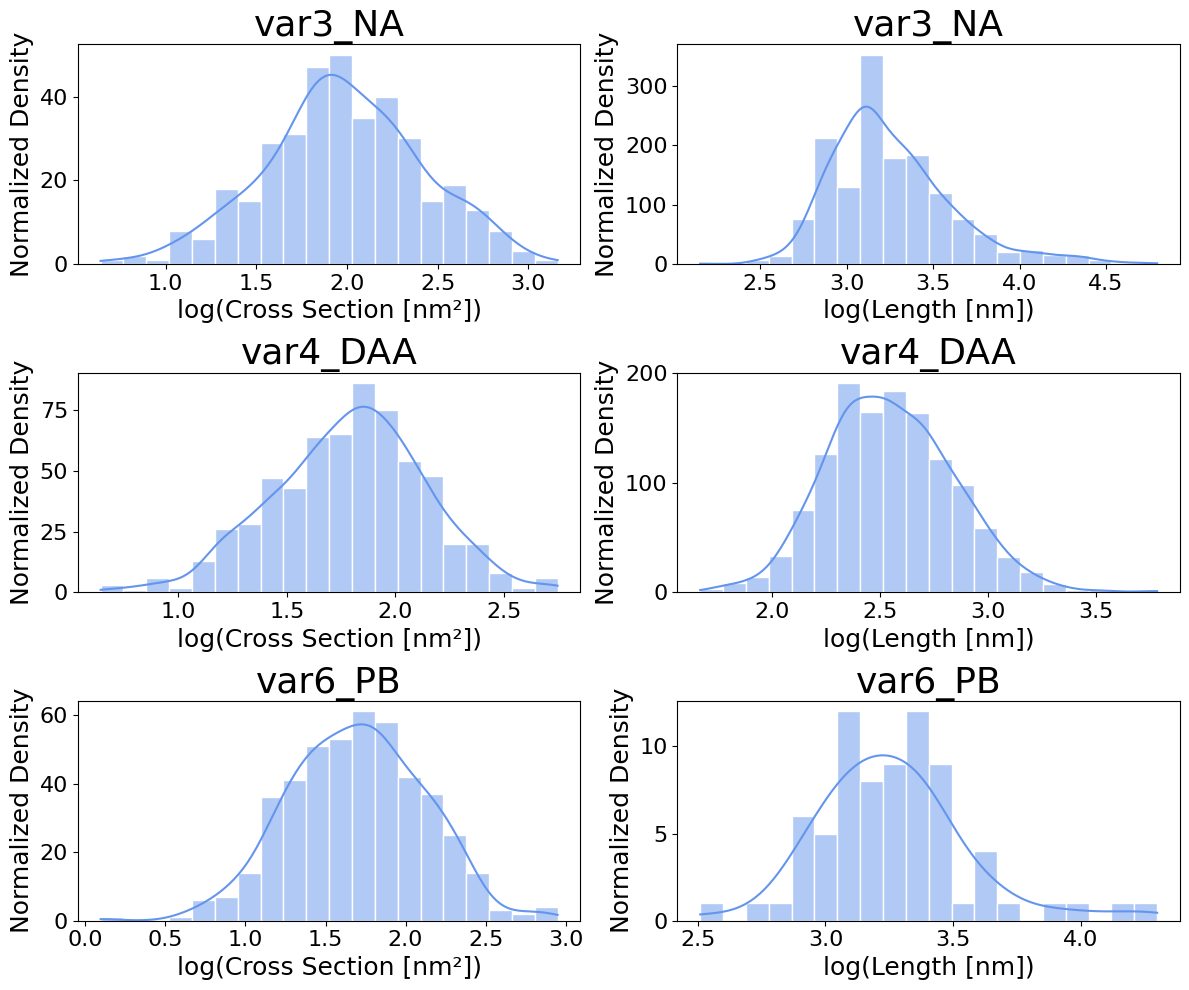

In [ ]:


alloys = ['var3_NA', 'var4_DAA', 'var6_PB']
csv_labels = ['Cross section [nm^2]', 'Length [nm]']
display_labels = ['Cross Section [nm²]', 'Length [nm]']

# Plot layout: 3 rows (one per alloy), 2 columns (cross section + length)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, alloy in enumerate(alloys):
    # Load data
    df_cross = pd.read_csv(f'{alloy}_statistics_cross.csv')
    df_len = pd.read_csv(f'{alloy}_statistics_length.csv')

    for j, (csv_label, disp_label) in enumerate(zip(csv_labels, display_labels)):
        data = df_cross[csv_label].dropna().values if j == 0 else df_len[csv_label].dropna().values
        log_data = np.log(data)

        # Plot
        ax = axes[i, j]
        sns.histplot(log_data, kde=True, bins=20, ax=ax, color='cornflowerblue', edgecolor='white')
        ax.set_title(f'{alloy}', fontsize=26)
        ax.set_xlabel(f'log({disp_label})', fontsize=18)
        ax.set_ylabel('Normalized Density', fontsize=18)
        ax.tick_params(axis='both', labelsize=16)

# Save and show
plt.tight_layout()
plt.savefig("log_transformed_distributions.png", dpi=300)
plt.show()
